<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-03-12 09:24:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  54.3MB/s    in 2.8s    

2025-03-12 09:24:53 (54.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


In [3]:
print(df['SOPartFreq'].isnull().sum())
print(df['SOPartFreq'].unique())

20200
[nan 'Multiple times per day' 'Daily or almost daily'
 'Less than once per month or monthly' 'A few times per week'
 'A few times per month or weekly'
 'I have never participated in Q&A on Stack Overflow']


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


/tmp/ipykernel_2506/3093949417.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numer['Age'] = df['Age'].replace({


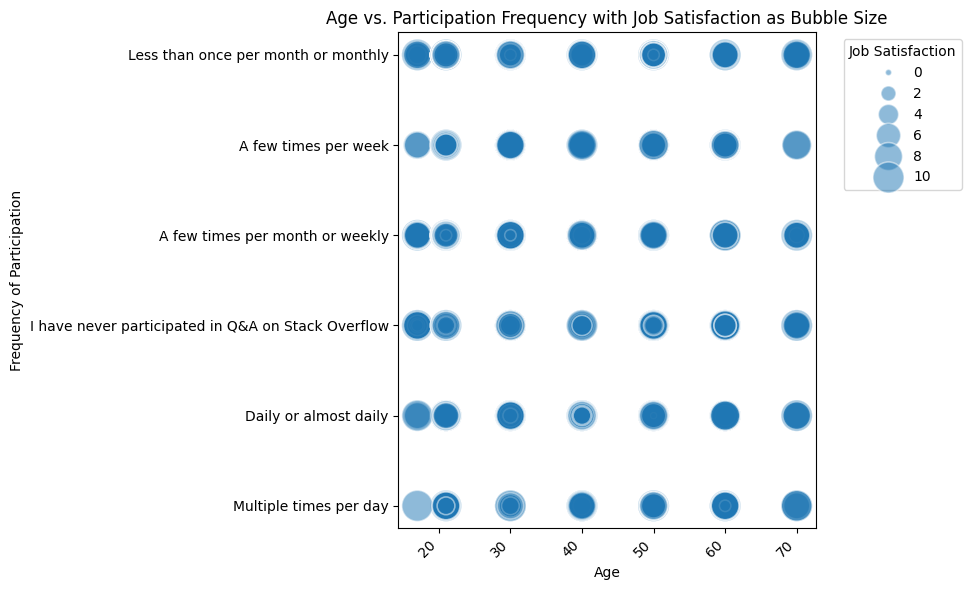

In [4]:
#create a new df with age as numerical value
df_numer=df.copy()
df_numer['Age'] = df['Age'].replace({
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None  
})
df_numer_clean = df_numer[['Age', 'JobSat', 'SOPartFreq']].dropna()

#create the plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_numer_clean, y='SOPartFreq', x = 'Age', size='JobSat', sizes=(20, 500), alpha=0.5) 
plt.title('Age vs. Participation Frequency with Job Satisfaction as Bubble Size')
plt.xlabel('Age')
plt.ylabel('Frequency of Participation')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


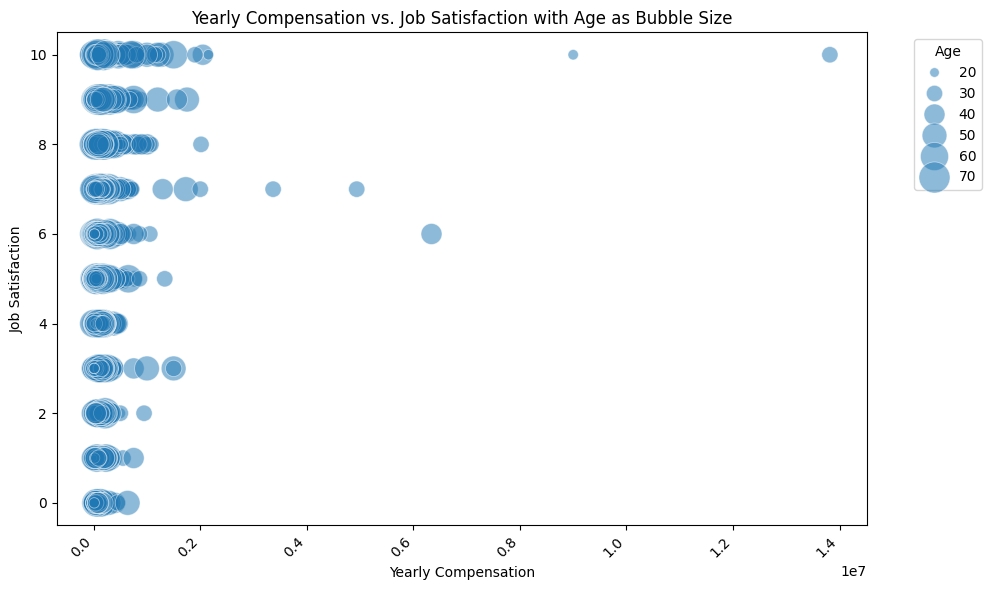

In [5]:
#using the age number df and drop the missing values
df_numer_comp=df_numer[['Age', 'JobSat', 'ConvertedCompYearly']].dropna()

#create the plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_numer_comp, y='JobSat', x = 'ConvertedCompYearly', size='Age', sizes=(20, 500), alpha=0.5) 
plt.title('Yearly Compensation vs. Job Satisfaction with Age as Bubble Size')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



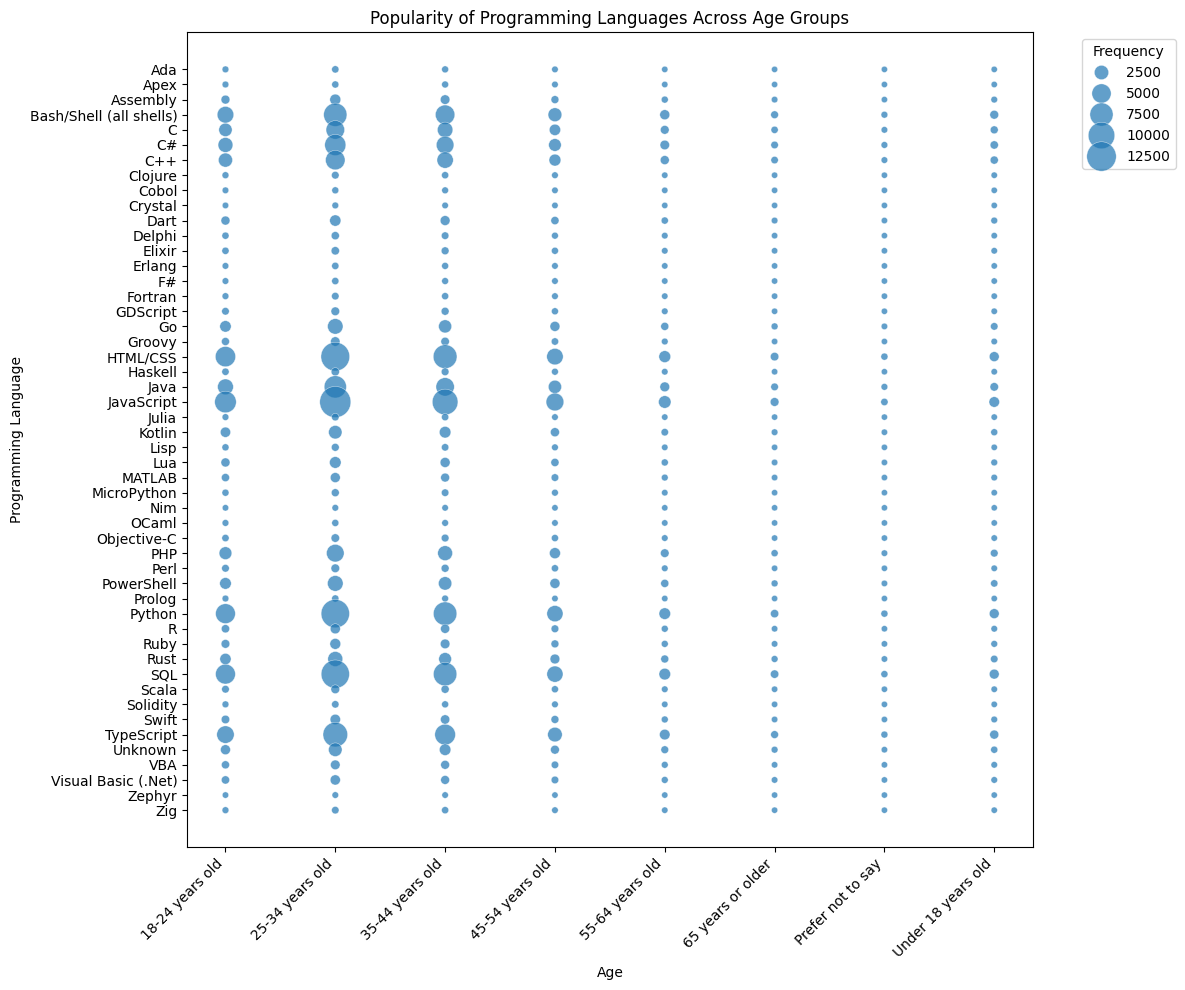

In [6]:
# Create a new df only with the relative columns to have the numerical values
df_lang = df[['LanguageHaveWorkedWith', 'Age']].copy()

# Replace missing values in the 'LanguageHaveWorkedWith' column
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].fillna('Unknown')
#drop missing values
df_lang = df_lang.dropna(subset=['Age'])

# Separate the answers that contain multiple values
df_lang_split = df_lang['LanguageHaveWorkedWith'].str.split(';', expand=True)
df_lang_list = df_lang_split.stack().reset_index(drop=True)

# Get the corresponding Age for each entry 
age_dataset = df_lang['Age'].repeat(df_lang_split.shape[1]).reset_index(drop=True)

# New DataFrame with Age, Language, and frequency (count)
df_lang_freq = pd.DataFrame({'Age': age_dataset, 'Language': df_lang_list})

# Count the frequency of each Language by Age group
language_counts = df_lang_freq.groupby(['Age', 'Language']).size().reset_index(name='Frequency')

# Create the plot
plt.figure(figsize=(12, 10))
sns.scatterplot(data=language_counts, x='Age', y='Language', size='Frequency', sizes=(20, 500), alpha=0.7)

plt.title('Popularity of Programming Languages Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Programming Language')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


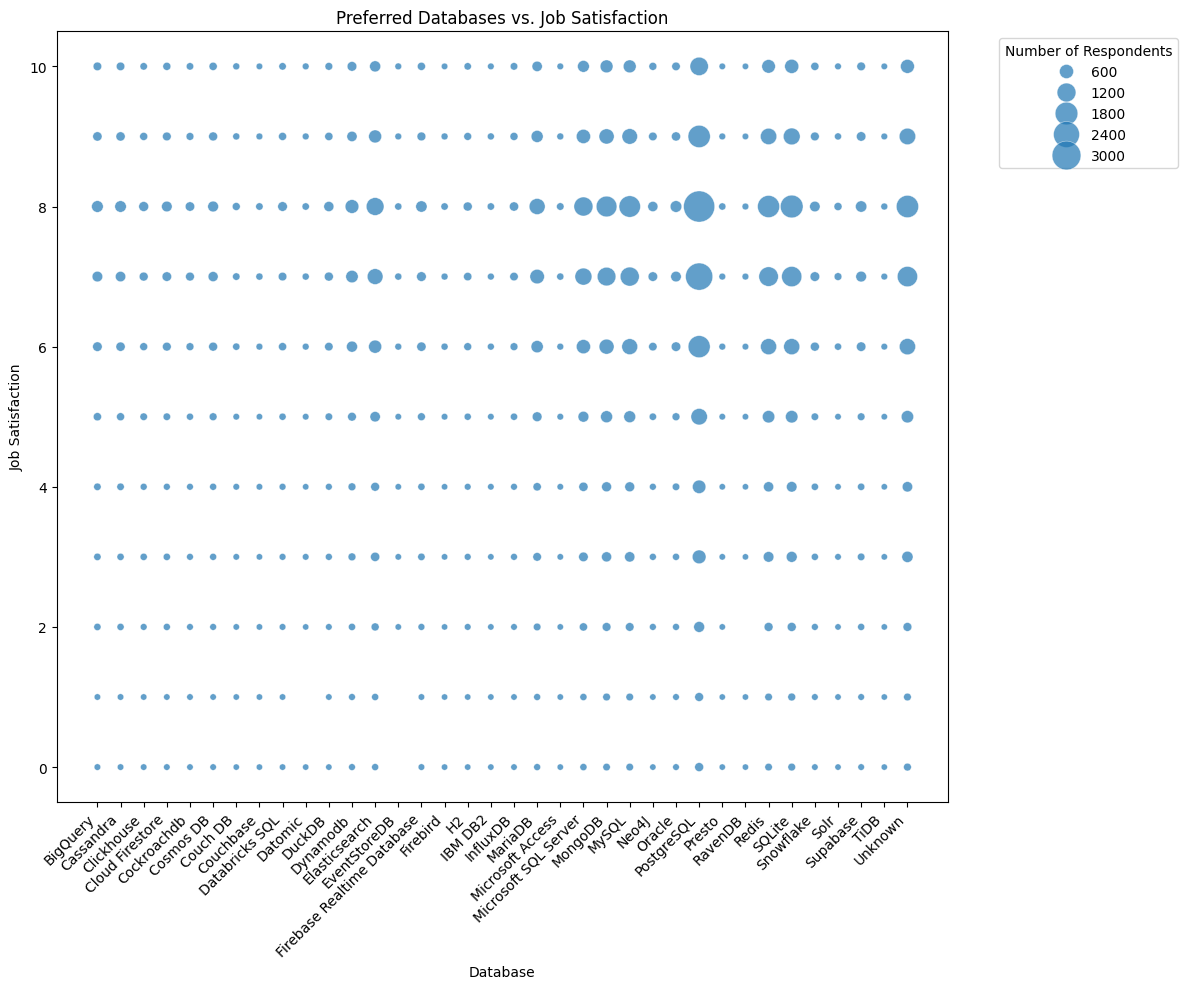

In [7]:
# Create a new df only with the relative columns to have the numerical values
df_data = df[['DatabaseWantToWorkWith', 'JobSat']].copy()

# Replace missing values in the 'LanguageHaveWorkedWith' column
df_data['DatabaseWantToWorkWith'] = df_data['DatabaseWantToWorkWith'].fillna('Unknown')
#drop missing values
df_data = df_data.dropna(subset=['JobSat'])

# Separate the answers that contain multiple values
df_data_split = df_data['DatabaseWantToWorkWith'].str.split(';', expand=True)
df_data_list = df_data_split.stack().reset_index(drop=True)

# Get the corresponding JobSat for each entry 
jobsat_group = df_data['JobSat'].repeat(df_data_split.shape[1]).reset_index(drop=True)


# New DataFrame with JobSat, Database and frequency (count)
df_data_freq = pd.DataFrame({'JobSat': jobsat_group, 'DatabaseWantToWorkWith': df_data_list})

# Count the frequency of each Language by Age group
database_counts = df_data_freq.groupby(['DatabaseWantToWorkWith', 'JobSat']).size().reset_index(name='Frequency')

# Create the plot
plt.figure(figsize=(12, 10))
sns.scatterplot(data=database_counts, x='DatabaseWantToWorkWith', y='JobSat', size='Frequency', sizes=(20, 500), alpha=0.7, legend=True)

plt.title('Preferred Databases vs. Job Satisfaction')
plt.xlabel('Database')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45, ha="right")  
plt.legend(title='Number of Respondents', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


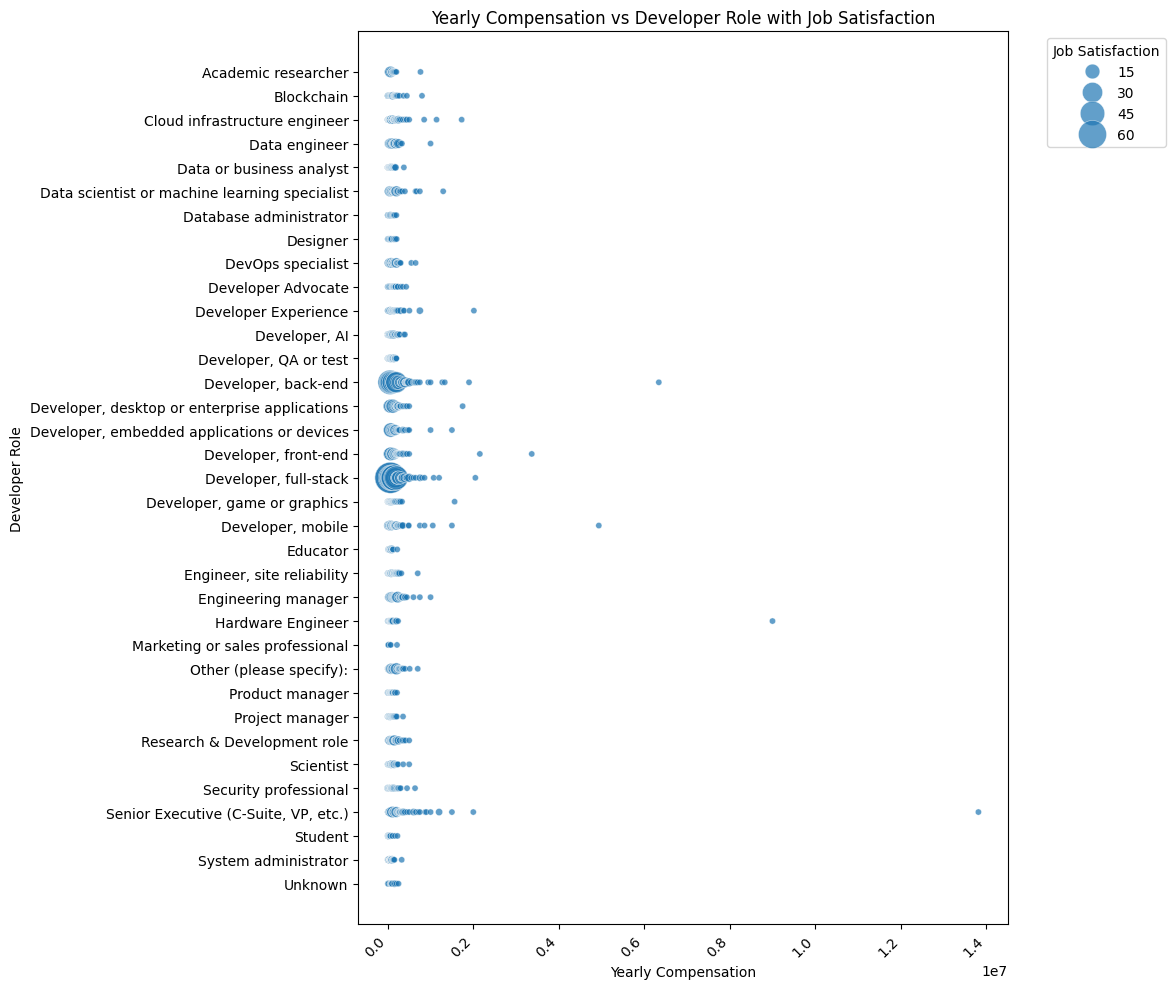

In [8]:
# Create a new df only with the relative columns to have the numerical values
df_dev = df[['ConvertedCompYearly', 'DevType','JobSat']].copy()

# Replace missing values in the 'DevType' column
df_dev['DevType'] = df_dev['DevType'].fillna('Unknown')
#drop missing values
df_dev = df_dev.dropna(subset=['JobSat','ConvertedCompYearly'])

# Separate the answers that contain multiple values
df_dev_split = df_dev['DevType'].str.split(';', expand=True)
df_dev_list = df_dev_split.stack().reset_index(drop=True)

# Get the corresponding JobSat and CompYear for each entry 
comp_yearly = df_dev['ConvertedCompYearly'].repeat(df_dev_split.shape[1]).reset_index(drop=True)
job_satisfaction = df_dev['JobSat'].repeat(df_dev_split.shape[1]).reset_index(drop=True)


# New DataFrame with JobSat, DevType and Compensation
df_dev_freq = pd.DataFrame({'ConvertedCompYearly': comp_yearly, 'DevType': df_dev_list, 'JobSat': job_satisfaction})

# Count the frequency 
dev_counts = df_dev_freq.groupby(['DevType', 'ConvertedCompYearly']).size().reset_index(name='JobSat')
dev_counts = df_dev_freq.groupby(['DevType', 'ConvertedCompYearly']).size().reset_index(name='JobSat')

# Create the plot
plt.figure(figsize=(12, 10))
sns.scatterplot(data=dev_counts, x='ConvertedCompYearly', y='DevType', size='JobSat', sizes=(20, 500), alpha=0.7, legend=True)

plt.title('Yearly Compensation vs Developer Role with Job Satisfaction')
plt.xlabel('Yearly Compensation')
plt.ylabel('Developer Role')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


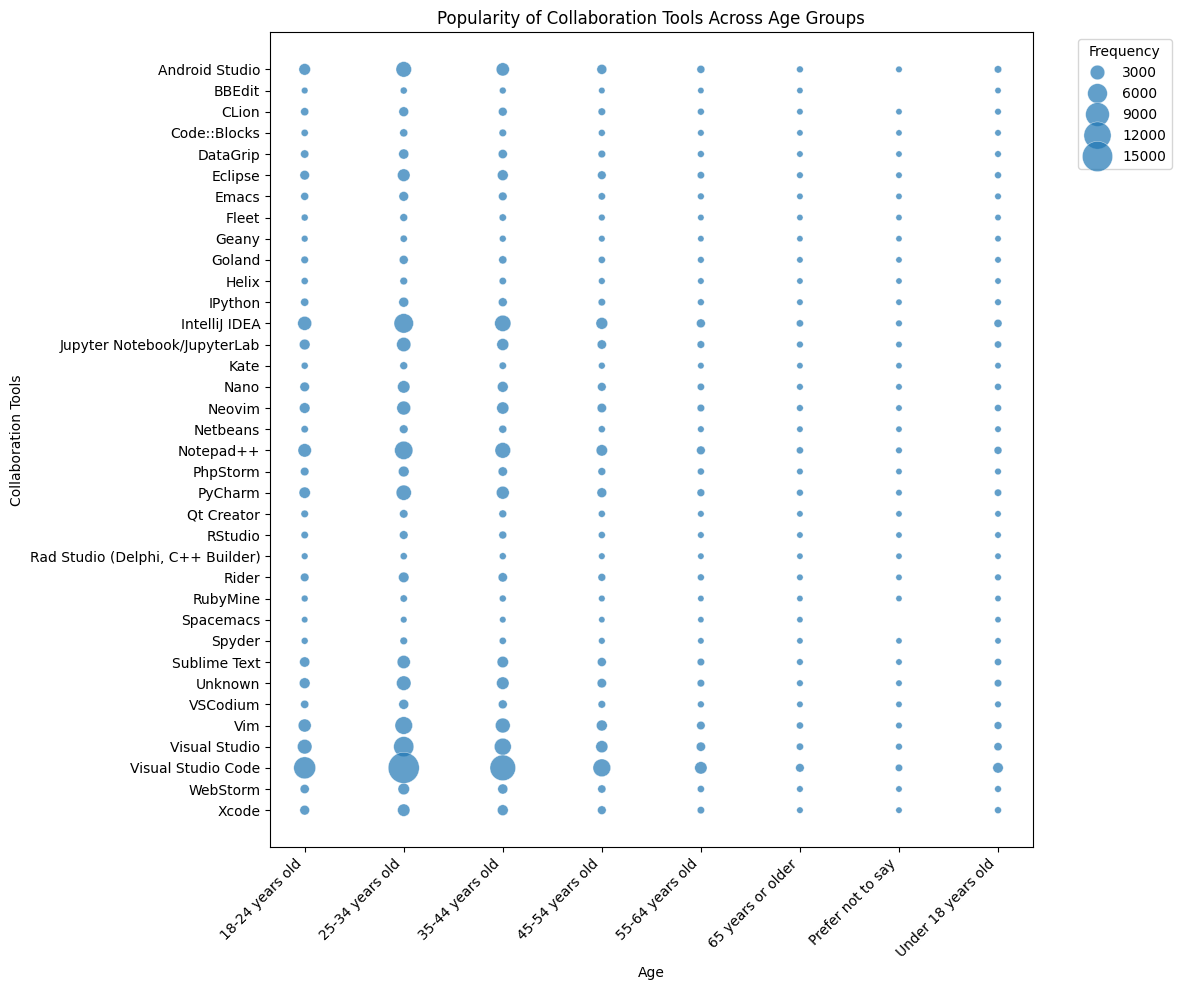

In [9]:
# Create a new df only with the relative columns to have the numerical values
df_tools= df[['NEWCollabToolsHaveWorkedWith', 'Age']].copy()

# Replace missing values in the 'NEWCollabToolsHaveWorkedWith' column
df_tools['NEWCollabToolsHaveWorkedWith'] = df_tools['NEWCollabToolsHaveWorkedWith'].fillna('Unknown')
#drop missing values
df_tools = df_tools.dropna(subset=['Age'])

# Separate the answers that contain multiple values
df_tools_split = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';', expand=True)
df_tools_list = df_tools_split.stack().reset_index(drop=True)

# Get the corresponding Age for each entry 
age_group = df_tools['Age'].repeat(df_tools_split.shape[1]).reset_index(drop=True)

# New DataFrame with Age, Tools, and frequency (count)
df_tools_freq = pd.DataFrame({'Age': age_group, 'Tools': df_tools_list})

# Count the frequency of each Language by Age group
tools_counts = df_tools_freq.groupby(['Age', 'Tools']).size().reset_index(name='Frequency')

# Create the plot
plt.figure(figsize=(12, 10))
sns.scatterplot(data=tools_counts, x='Age', y='Tools', size='Frequency', sizes=(20, 500), alpha=0.7)

plt.title('Popularity of Collaboration Tools Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Collaboration Tools')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



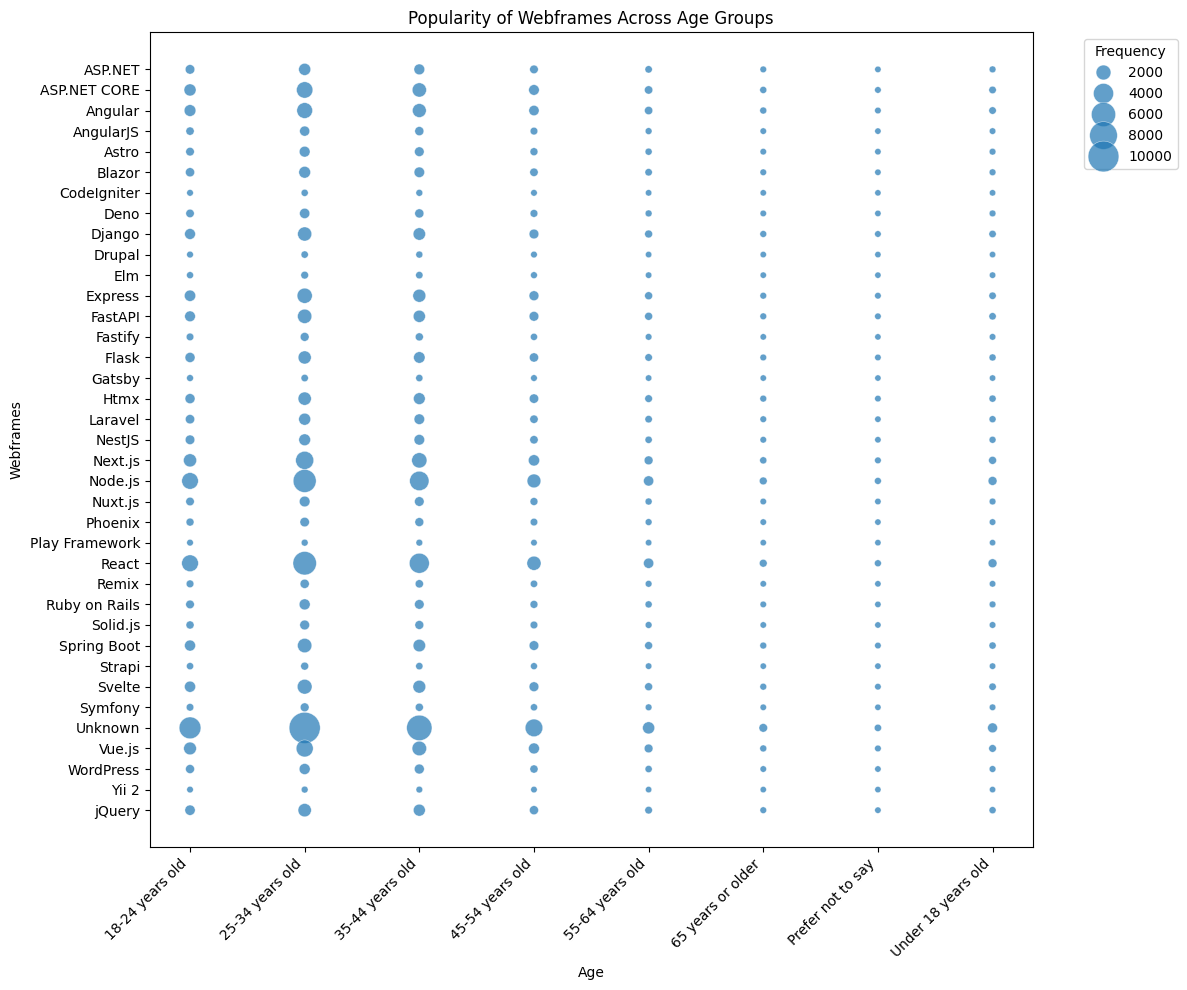

In [10]:
# Create a new df only with the relative columns to have the numerical values
df_web= df[['WebframeWantToWorkWith', 'Age']].copy()

# Replace missing values in the WebframeWantToWorkWithcolumn
df_web['WebframeWantToWorkWith'] = df_web['WebframeWantToWorkWith'].fillna('Unknown')
#drop missing values
df_web = df_web.dropna(subset=['Age'])

# Separate the answers that contain multiple values
df_web_split = df_web['WebframeWantToWorkWith'].str.split(';', expand=True)
df_web_list = df_web_split.stack().reset_index(drop=True)

# Get the corresponding Age for each entry 
age_groups = df_web['Age'].repeat(df_web_split.shape[1]).reset_index(drop=True)

# New DataFrame with Age, Webframe, and frequency (count)
df_web_freq = pd.DataFrame({'Age': age_groups, 'Webframe': df_web_list})

# Count the frequency of each Language by Age group
web_counts = df_web_freq.groupby(['Age', 'Webframe']).size().reset_index(name='Frequency')

# Create the plot
plt.figure(figsize=(12, 10))
sns.scatterplot(data=web_counts, x='Age', y='Webframe', size='Frequency', sizes=(20, 500), alpha=0.7)

plt.title('Popularity of Webframes Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Webframes')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [11]:
print(df['LanguageAdmired'].isnull().sum())

14565


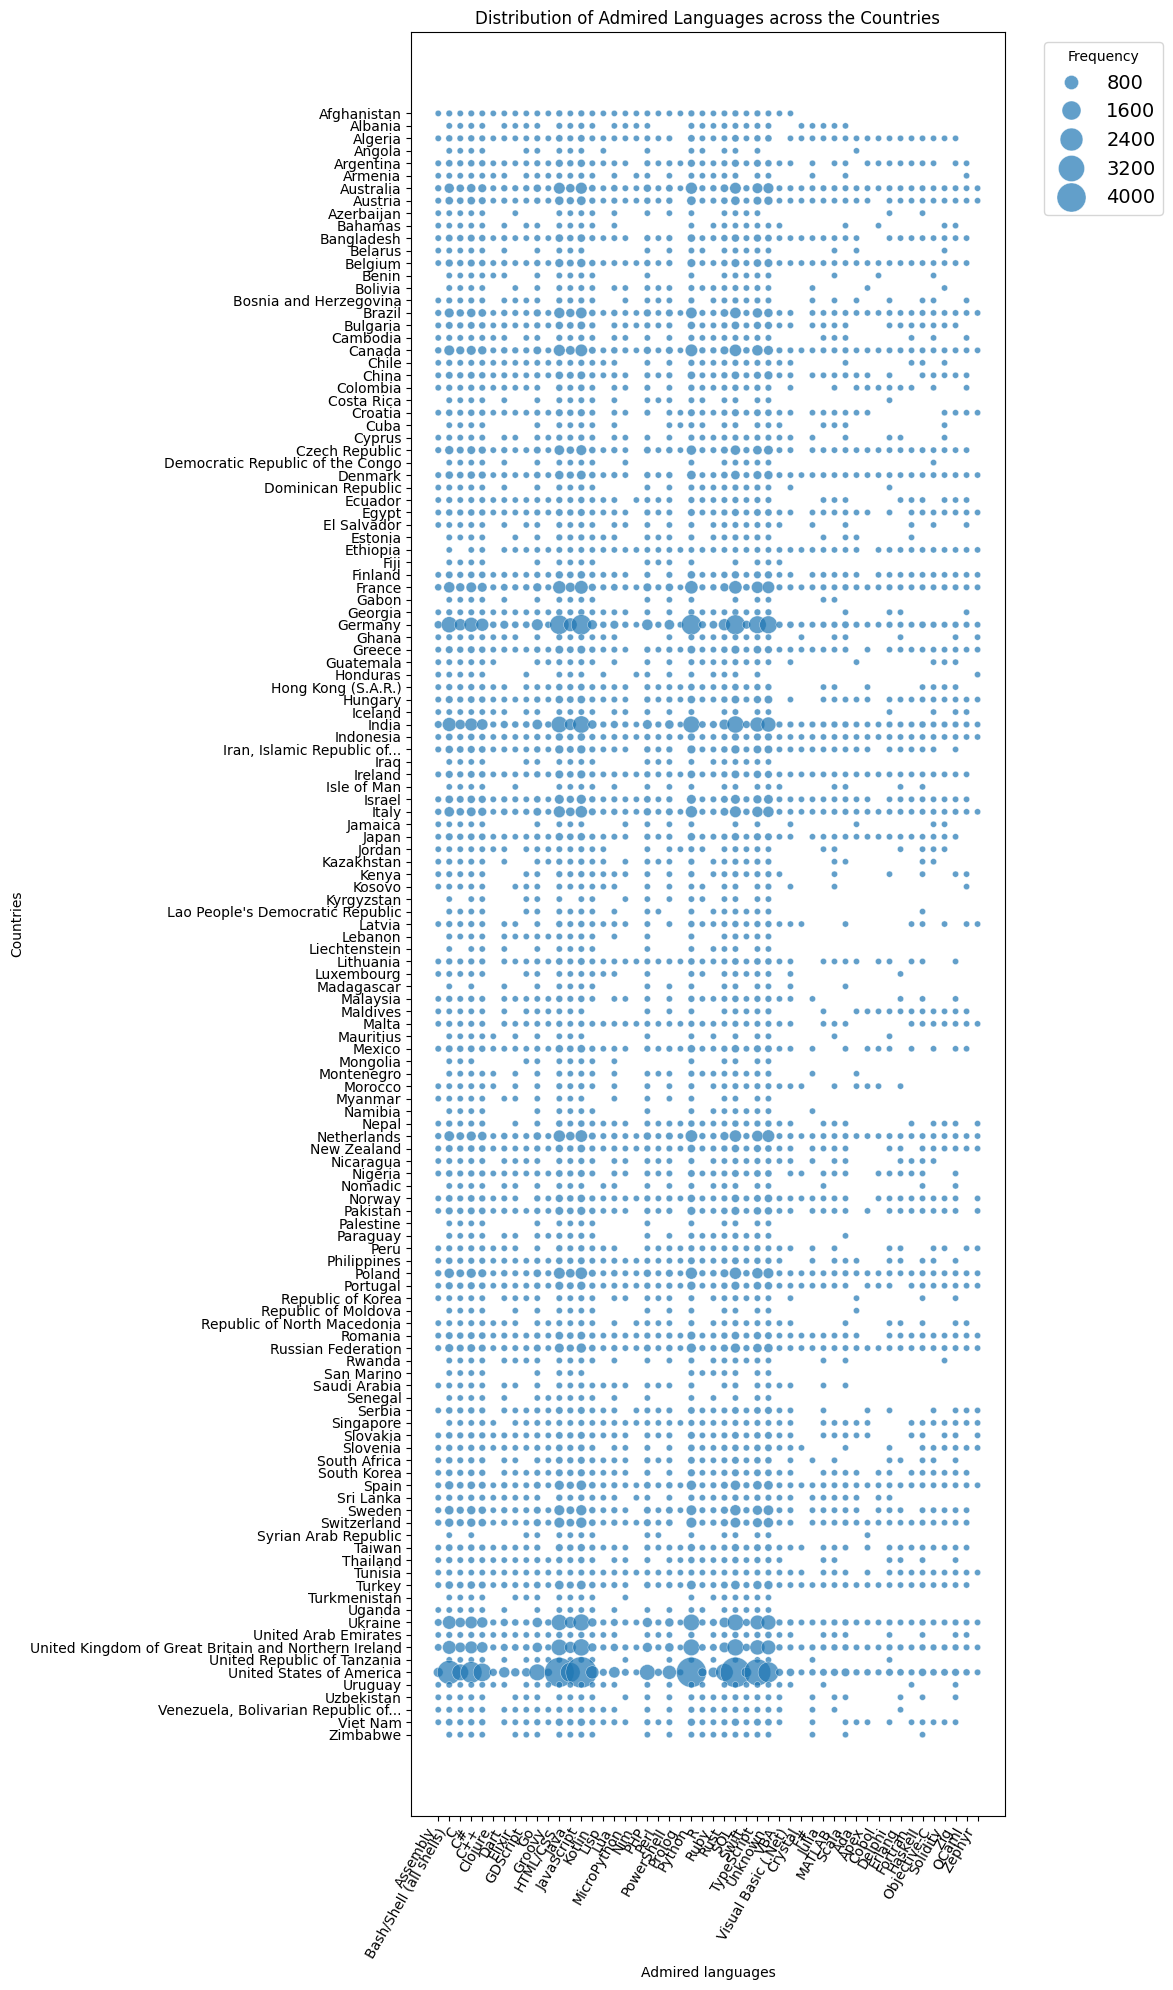

In [12]:
#create a new df with the relevant columns
df_admired=df[['LanguageAdmired', 'Country']].copy()
#replace missing values for Unknown
df_admired = df_admired.fillna('Unknown')

# Separate the answers that contain multiple values
df_admired_split =df_admired['LanguageAdmired'].str.split(';', expand=True)
df_admired_list = df_admired_split.stack().reset_index(drop= True)
# Get the corresponding Country for each entry 
country_groups = df_admired['Country'].repeat(df_admired_split.shape[1]).reset_index(drop=True)

#new df for Country, Frequency(count) and Language
df_admired_freq = pd.DataFrame({'Country': country_groups, 'LanguageAdmired': df_admired_list})
#count frequency
admired_counts = df_admired_freq.groupby(['Country','LanguageAdmired']).size().reset_index(name='Frequency')

#create the plot
plt.figure(figsize=(12,20))
sns.scatterplot(data=admired_counts, x='LanguageAdmired', y='Country', size='Frequency', sizes=(20, 500), alpha=0.7)
plt.ylabel('Countries')
plt.xlabel('Admired languages')
plt.title('Distribution of Admired Languages across the Countries')

plt.xticks(rotation=60, ha="right",fontsize=10)
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
